#### Использование matchTemplate на нескольких изображениях

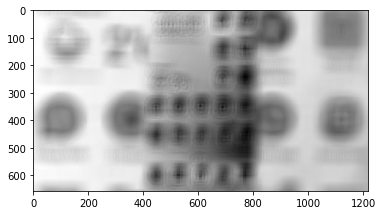

In [3]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

template = cv2.imread('icon.jpg', 0)
h, w = template.shape[::] 


for img in os.listdir('test'):
    #methods available: ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
    #            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
    img_rgb = cv2.imread('test/' + img)
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
    res = cv2.matchTemplate(img_gray, template, cv2.TM_SQDIFF)
    # For TM_SQDIFF, Good match yields minimum value; bad match yields large values
    # For all others it is exactly opposite, max value = good fit.
    plt.imshow(res, cmap='gray')

    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    top_left = min_loc  #Change to max_loc for all except for TM_SQDIFF
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img_gray, top_left, bottom_right, 255, 2)  #White rectangle with thickness 2. 

    cv2.imwrite("result_without_resize/" + img, img_gray)
       

#### использование matchTemplate на одном изображении в разных масштабах

test (1).jpeg
test (1).jpg
test (1).png
test (2).jpeg
test (3).jpeg
test (3).jpg
test (4).jpg
test (5).jpg
test (7).jpg


error: OpenCV(4.1.2) C:\projects\opencv-python\opencv\modules\imgproc\src\templmatch.cpp:1109: error: (-215:Assertion failed) _img.size().height <= _templ.size().height && _img.size().width <= _templ.size().width in function 'cv::matchTemplate'


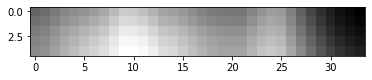

In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


template = cv2.imread('icon.jpg', 0)
h, w = template.shape[::] 

for img in os.listdir('test'):
    print(img)
    for size in np.arange(0.1, 1, 0.1):
        img_rgb = cv2.imread('test/' + img)
        img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
        img_gray = cv2.resize(img_gray, None,fx=size,fy=size)
        res = cv2.matchTemplate(img_gray, template, cv2.TM_SQDIFF)
        # For TM_SQDIFF, Good match yields minimum value; bad match yields large values
        # For all others it is exactly opposite, max value = good fit.
        plt.imshow(res, cmap='gray')

        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

        top_left = min_loc  #Change to max_loc for all except for TM_SQDIFF
        bottom_right = (top_left[0] + w, top_left[1] + h)
        cv2.rectangle(img_gray, top_left, bottom_right, 255, 2)  #White rectangle with thickness 2. 

        cv2.imwrite("result_with_resize/" + str(size) + img, img_gray)